### Heart disease predictor model!!!

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [104]:
data=pd.read_csv(r"C:\\Users\\Shree and Co\\Desktop\\project_1\\heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [105]:
x=data.drop("target",axis=1)
y=data["target"]

In [106]:
np.random.seed(98)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

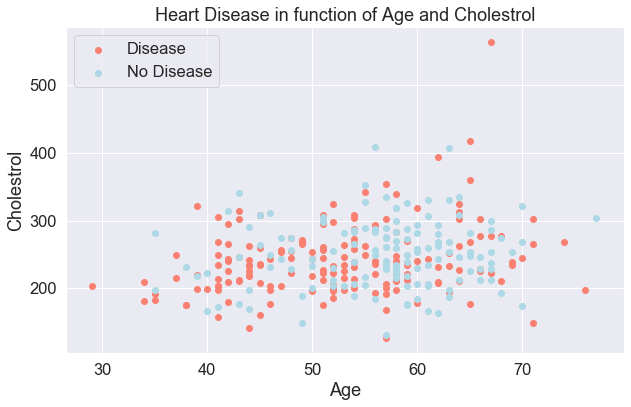

In [107]:
plt.figure(figsize=(10,6))

plt.scatter(data.age[data.target==1], 
            data.chol[data.target==1], 
            c="salmon") # define it as a scatter figure

plt.scatter(data.age[data.target==0], 
            data.chol[data.target==0], 
            c="lightblue") # axis always come as (x, y)

plt.title("Heart Disease in function of Age and Cholestrol")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Cholestrol");

**Random Forest Model**

In [108]:
from sklearn.ensemble import RandomForestClassifier

In [109]:
rf=RandomForestClassifier(n_estimators=500)

In [110]:
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [111]:
y_pred=rf.predict(x_test)

Text(0, 0.5, 'y_pred')

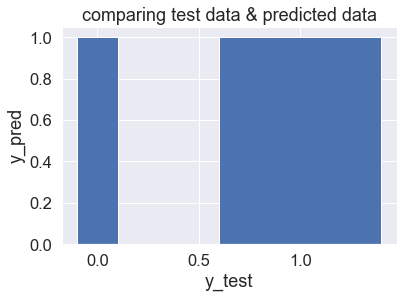

In [112]:
plt.bar(y_test,y_pred);
plt.title("comparing test data & predicted data")
plt.xlabel("y_test")
plt.ylabel("y_pred")

In [113]:
model_1=rf.score(x_test,y_test)
model_1

0.819672131147541

In [114]:
from sklearn.metrics import classification_report

In [115]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.80      0.78        25
           1       0.86      0.83      0.85        36

    accuracy                           0.82        61
   macro avg       0.81      0.82      0.81        61
weighted avg       0.82      0.82      0.82        61



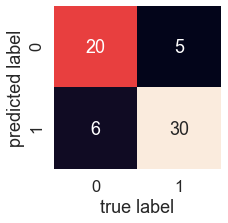

In [116]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_pred):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_pred),
                     annot=True, # Annotate the boxes
                     cbar=False)
    
    bottom,top=ax.get_ylim()
    ax.set_ylim(bottom+0.5,top-0.5)

    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, y_pred)

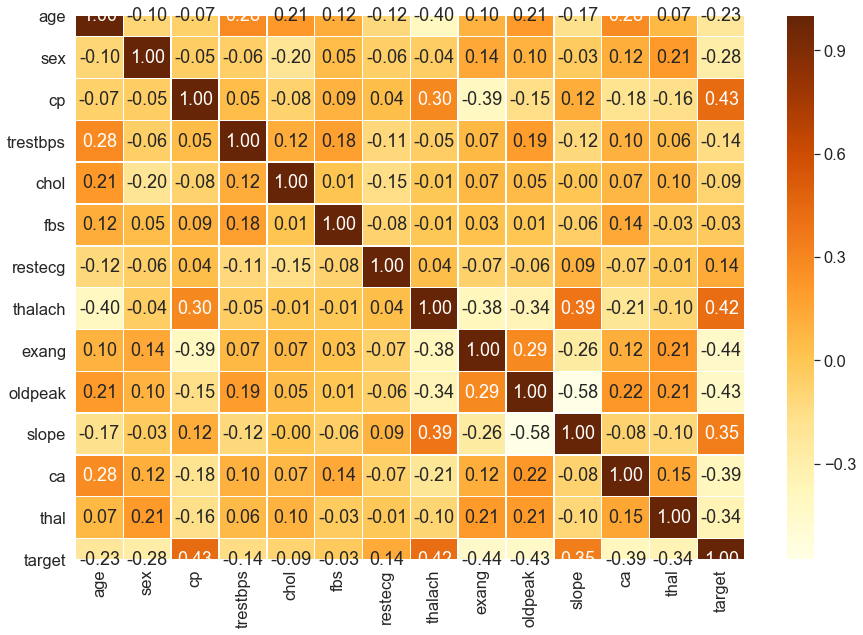

In [117]:
corr_matrix = data.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlOrBr");

**Linear SVC Model**

In [118]:
from sklearn.svm import LinearSVC

In [119]:
svc=LinearSVC()

In [120]:
svc.fit(x_train,y_train)

C:\Users\Shree and Co\Anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [121]:
y_pre=svc.predict(x_test)

In [122]:
model_2=svc.score(x_test,y_test)
model_2

0.6065573770491803

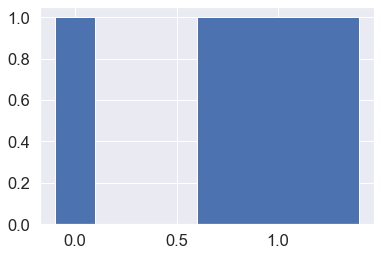

In [123]:
plt.bar(y_test,y_pre);

In [124]:
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           0       0.51      0.96      0.67        25
           1       0.93      0.36      0.52        36

    accuracy                           0.61        61
   macro avg       0.72      0.66      0.59        61
weighted avg       0.76      0.61      0.58        61



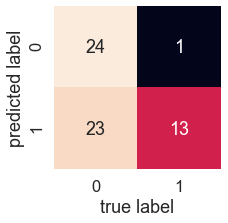

In [125]:
plot_conf_mat(y_test,y_pre)

**KNeighbors Model**

In [126]:
from sklearn.neighbors import KNeighborsClassifier

In [127]:
knn=KNeighborsClassifier()

In [128]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [129]:
y_pr=knn.predict(x_test)

In [130]:
model_3=knn.score(x_test,y_test)
model_3

0.7704918032786885

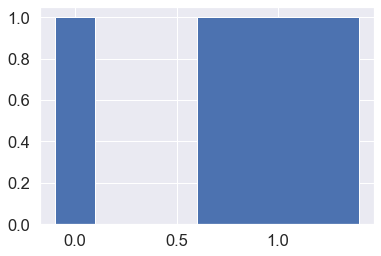

In [131]:
plt.bar(y_test,y_pr);

In [132]:
print(classification_report(y_test,y_pr))

              precision    recall  f1-score   support

           0       0.76      0.64      0.70        25
           1       0.78      0.86      0.82        36

    accuracy                           0.77        61
   macro avg       0.77      0.75      0.76        61
weighted avg       0.77      0.77      0.77        61



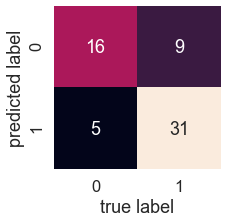

In [133]:
plot_conf_mat(y_test,y_pr)

**Comparing all 3 Models**

In [134]:
models=["Random Forest","Linear SVC","KNeighbors"]
scores=[model_1,model_2,model_3]

Text(0.5, 0, 'model')

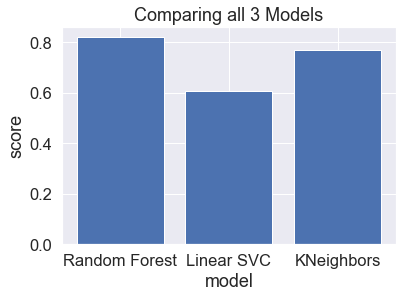

In [135]:
plt.bar(models,scores);
plt.title("Comparing all 3 Models")
plt.ylabel("score")
plt.xlabel("model")

In [136]:
np.random.seed(98)
random_val=np.random.randint(0,len(data))
new_x=data.drop("target",axis=1).iloc[random_val]
new_x

age          45.0
sex           1.0
cp            0.0
trestbps    104.0
chol        208.0
fbs           0.0
restecg       0.0
thalach     148.0
exang         1.0
oldpeak       3.0
slope         1.0
ca            0.0
thal          2.0
Name: 42, dtype: float64

In [137]:
data.iloc[random_val]["target"]

1.0

In [138]:
y_rf=rf.predict(new_x.values.reshape(1,13))
y_rf

array([1], dtype=int64)

In [139]:
y_svc=svc.predict(new_x.values.reshape(1,13))
y_svc

array([0], dtype=int64)

In [140]:
y_knn=knn.predict(new_x.values.reshape(1,13))
y_knn

array([1], dtype=int64)

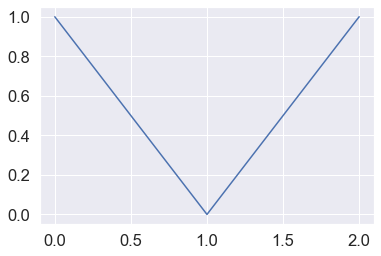

In [141]:
predicted_y=[y_rf,y_svc,y_knn]
plt.plot(predicted_y);

**Visualising the models in piechart**

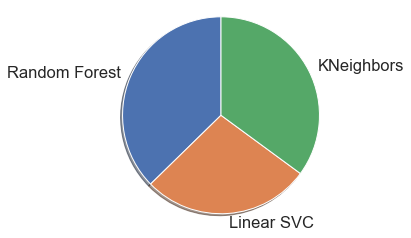

In [142]:
fig1, ax1 = plt.subplots()
ax1.pie(scores,labels=models,
        shadow=True, startangle=90)
ax1.axis('equal') 

plt.show()
